In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,confusion_matrix,r2_score
from sklearn.model_selection import train_test_split

C:\Users\spard\DEMO\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
t=pd.read_csv('C://Users//spard//OneDrive//Documents//soham/advertising.csv', encoding = 'ISO-8859-1')

In [3]:
t

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
t.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
t.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
x=t.iloc[:,:-1]
y=t.iloc[:,-1]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=123)

In [8]:
corrmatrix=x_train.corr()

In [9]:
corrmatrix

,TV,Radio,Newspaper
TV,1.000000,0.009542,0.026836
Radio,0.009542,1.000000,0.386002
Newspaper,0.026836,0.386002,1.000000


<AxesSubplot:>

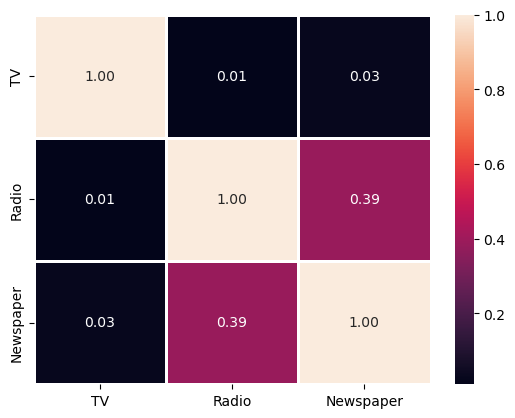

In [10]:
sns.heatmap(corrmatrix,fmt = '.2f',
            linewidths = 2,
            annot = True)

In [11]:
model=RandomForestRegressor(n_estimators=50)

In [12]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [13]:
model.score(x_test,y_test)

0.9787280777352207

In [14]:
y_pred=model.predict(x_test)
y_pred

array([16.488, 11.104, 13.876,  9.86 , 14.402, 19.88 , 16.68 , 20.954,
       19.482,  6.698, 11.398, 22.67 ,  9.366,  7.248,  5.908, 12.252,
       17.022, 17.568,  8.042, 18.824,  7.974, 12.036,  8.466,  9.846,
       23.178,  8.908, 14.806, 15.26 , 11.656, 21.818, 12.02 , 22.276,
       25.288,  7.366, 18.674, 19.622, 19.716, 22.236, 17.126, 11.676])

In [15]:
model.predict(np.array([[32.5,40,60]]))

C:\Users\spard\DEMO\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10.65])

In [16]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [17]:
mse,rmse

(0.6823222999999998, 0.826028026158919)

In [18]:
mean_absolute_error(y_test,y_pred)

0.6785499999999998

In [19]:
ap=pd.DataFrame(data={'actual':y_test,'predicted':y_pred})
ap

,actual,predicted
50,16.4,16.488
127,11.9,11.104
37,14.7,13.876
149,10.1,9.860
19,14.6,14.402
104,20.7,19.880
179,17.6,16.680
53,21.2,20.954
162,19.9,19.482
158,7.3,6.698


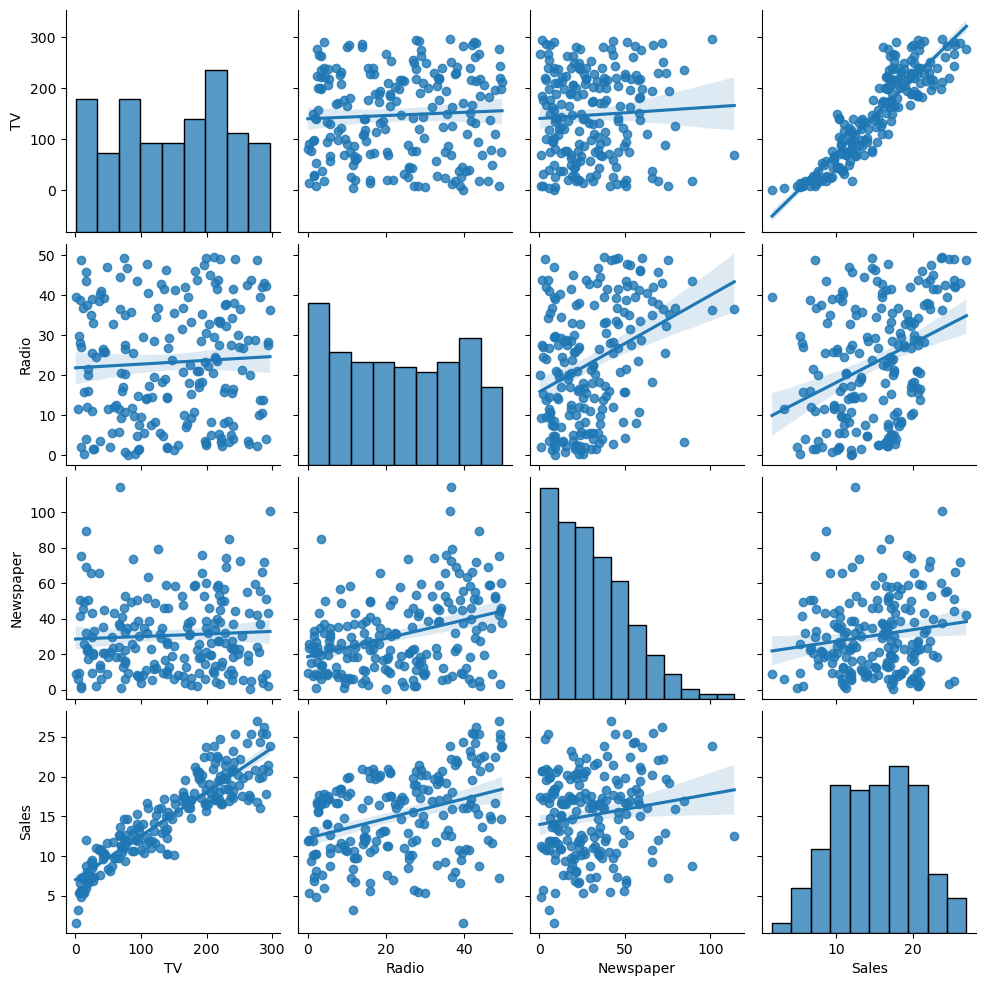

In [22]:
sns.pairplot(data=t,diag_kind='hist',kind='reg')